## DEEP LEARNING ASSIGNMENT 1<BR>

SUBMITTED BY: ANIRUDH JOSHI (CS23MTECH11002)<br>
DATE: 04/02/2024<br>

####

## PROBLEM 1

Perceptron learning algorithm<br>
[10 = dataset creation 2 + perceptron learning algorithm 5 + analysis 3]<br>

##### Generating Dataset

In [1]:
# importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np


# Function to generate linaerly separable dataset 
def generateDataset(slope, sep_lavel, factor):

    # eqn of decision boundary: slope*x + sep_level = factor*y 
    np.random.seed(0)
    x = np.random.rand(1100, 2)*100   # 1100 random points between 0 and 100
    count = 0                         # to keep track of how many points actually are left after 
    datapoints = []
    labels = []
    for i in range(len(x)):
        if (slope*x[i,0]+sep_lavel) < factor*x[i, 1]:
            datapoints.append(x[i])
            labels.append(1)
            count += 1
        elif (slope*x[i,0]-sep_lavel) > factor*x[i,1]:
            datapoints.append(x[i])
            labels.append(-1)
            count += 1
            
    return datapoints, labels

##### Helper Function For Plotting

In [2]:
# Plot dataset and decision boundary
def plot_dataset_with_decision_boundary(X, y, model):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
    
    x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    plt.plot(x_values, model.decision_boundary(x_values), color='green', linestyle='--', label='Decision Boundary')
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Linearly Separable Dataset with Decision Boundary')
    plt.legend()
    plt.show()

##### Perceptron Learning Algorithm

In [3]:
# We got our datapoints now we can implement the perceptron learning algorithm
class perceptron:

    def __init__(self, lr):
        self.lr = lr
    
    # fit function implements the perceptron learning algorithm, also does plotting for one of the gamma value.
    def fit(self, X, y, plotFlag):

        # initializing weights and biases
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        iterations=0
        misclassified=0

        # I only plot for the first gamma value on which we apply perceptron learning algorithm after which i set plotFlag to false.
        if plotFlag:
            fig, axs = plt.subplots(3, 3, figsize=(40, 40))
            fig.suptitle("Linearly separable dataset with classifier, (whenever update happened) for gamma:5", fontsize=32)
            rows, cols = 0, 0
        
        # perceptron learning algorithm
        for i, x in enumerate(X):
            if (np.dot(self.weights,x)+self.bias)*y[i] <= 0:
                self.weights = self.weights + self.lr*x*y[i]    # if +ve point misclassified we add x, if -ve misclass. we subtract x
                self.bias = self.bias + self.lr*y[i]
                misclassified += 1

                # not part of algorithm used for plotting after every iteration so that I can show how decision boundary learns and converges
                if plotFlag:
                    if rows<3 and cols<3:
                        axs[rows, cols].scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Class 1')
                        axs[rows, cols].scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
                        x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
                        axs[rows, cols].plot(x_values, self.decision_boundary(x_values), color='blue', linestyle='--', label='Decision Boundary')  
                        axs[rows, cols].set_title('Iteration: {}'.format(misclassified)) 
                    if cols<2:
                        cols += 1 
                    else:
                        rows += 1
                        cols=0        
        # number of iterations to converge will be the number of times we updated the parameters which is no. of misclassified points.
        iterations = misclassified        
        return iterations 
    
    def decision_boundary(self, x):
        return (-self.weights[0] / self.weights[1]) * x - (self.bias / self.weights[1])


##### Main Function

Gamma (level of separability): 5 	 Avg Number Of Iterations: 8.0
Gamma (level of separability): 3 	 Avg Number Of Iterations: 32.0
Gamma (level of separability): 4 	 Avg Number Of Iterations: 13.0
Gamma (level of separability): 10 	 Avg Number Of Iterations: 4.0
Gamma (level of separability): 12 	 Avg Number Of Iterations: 4.0


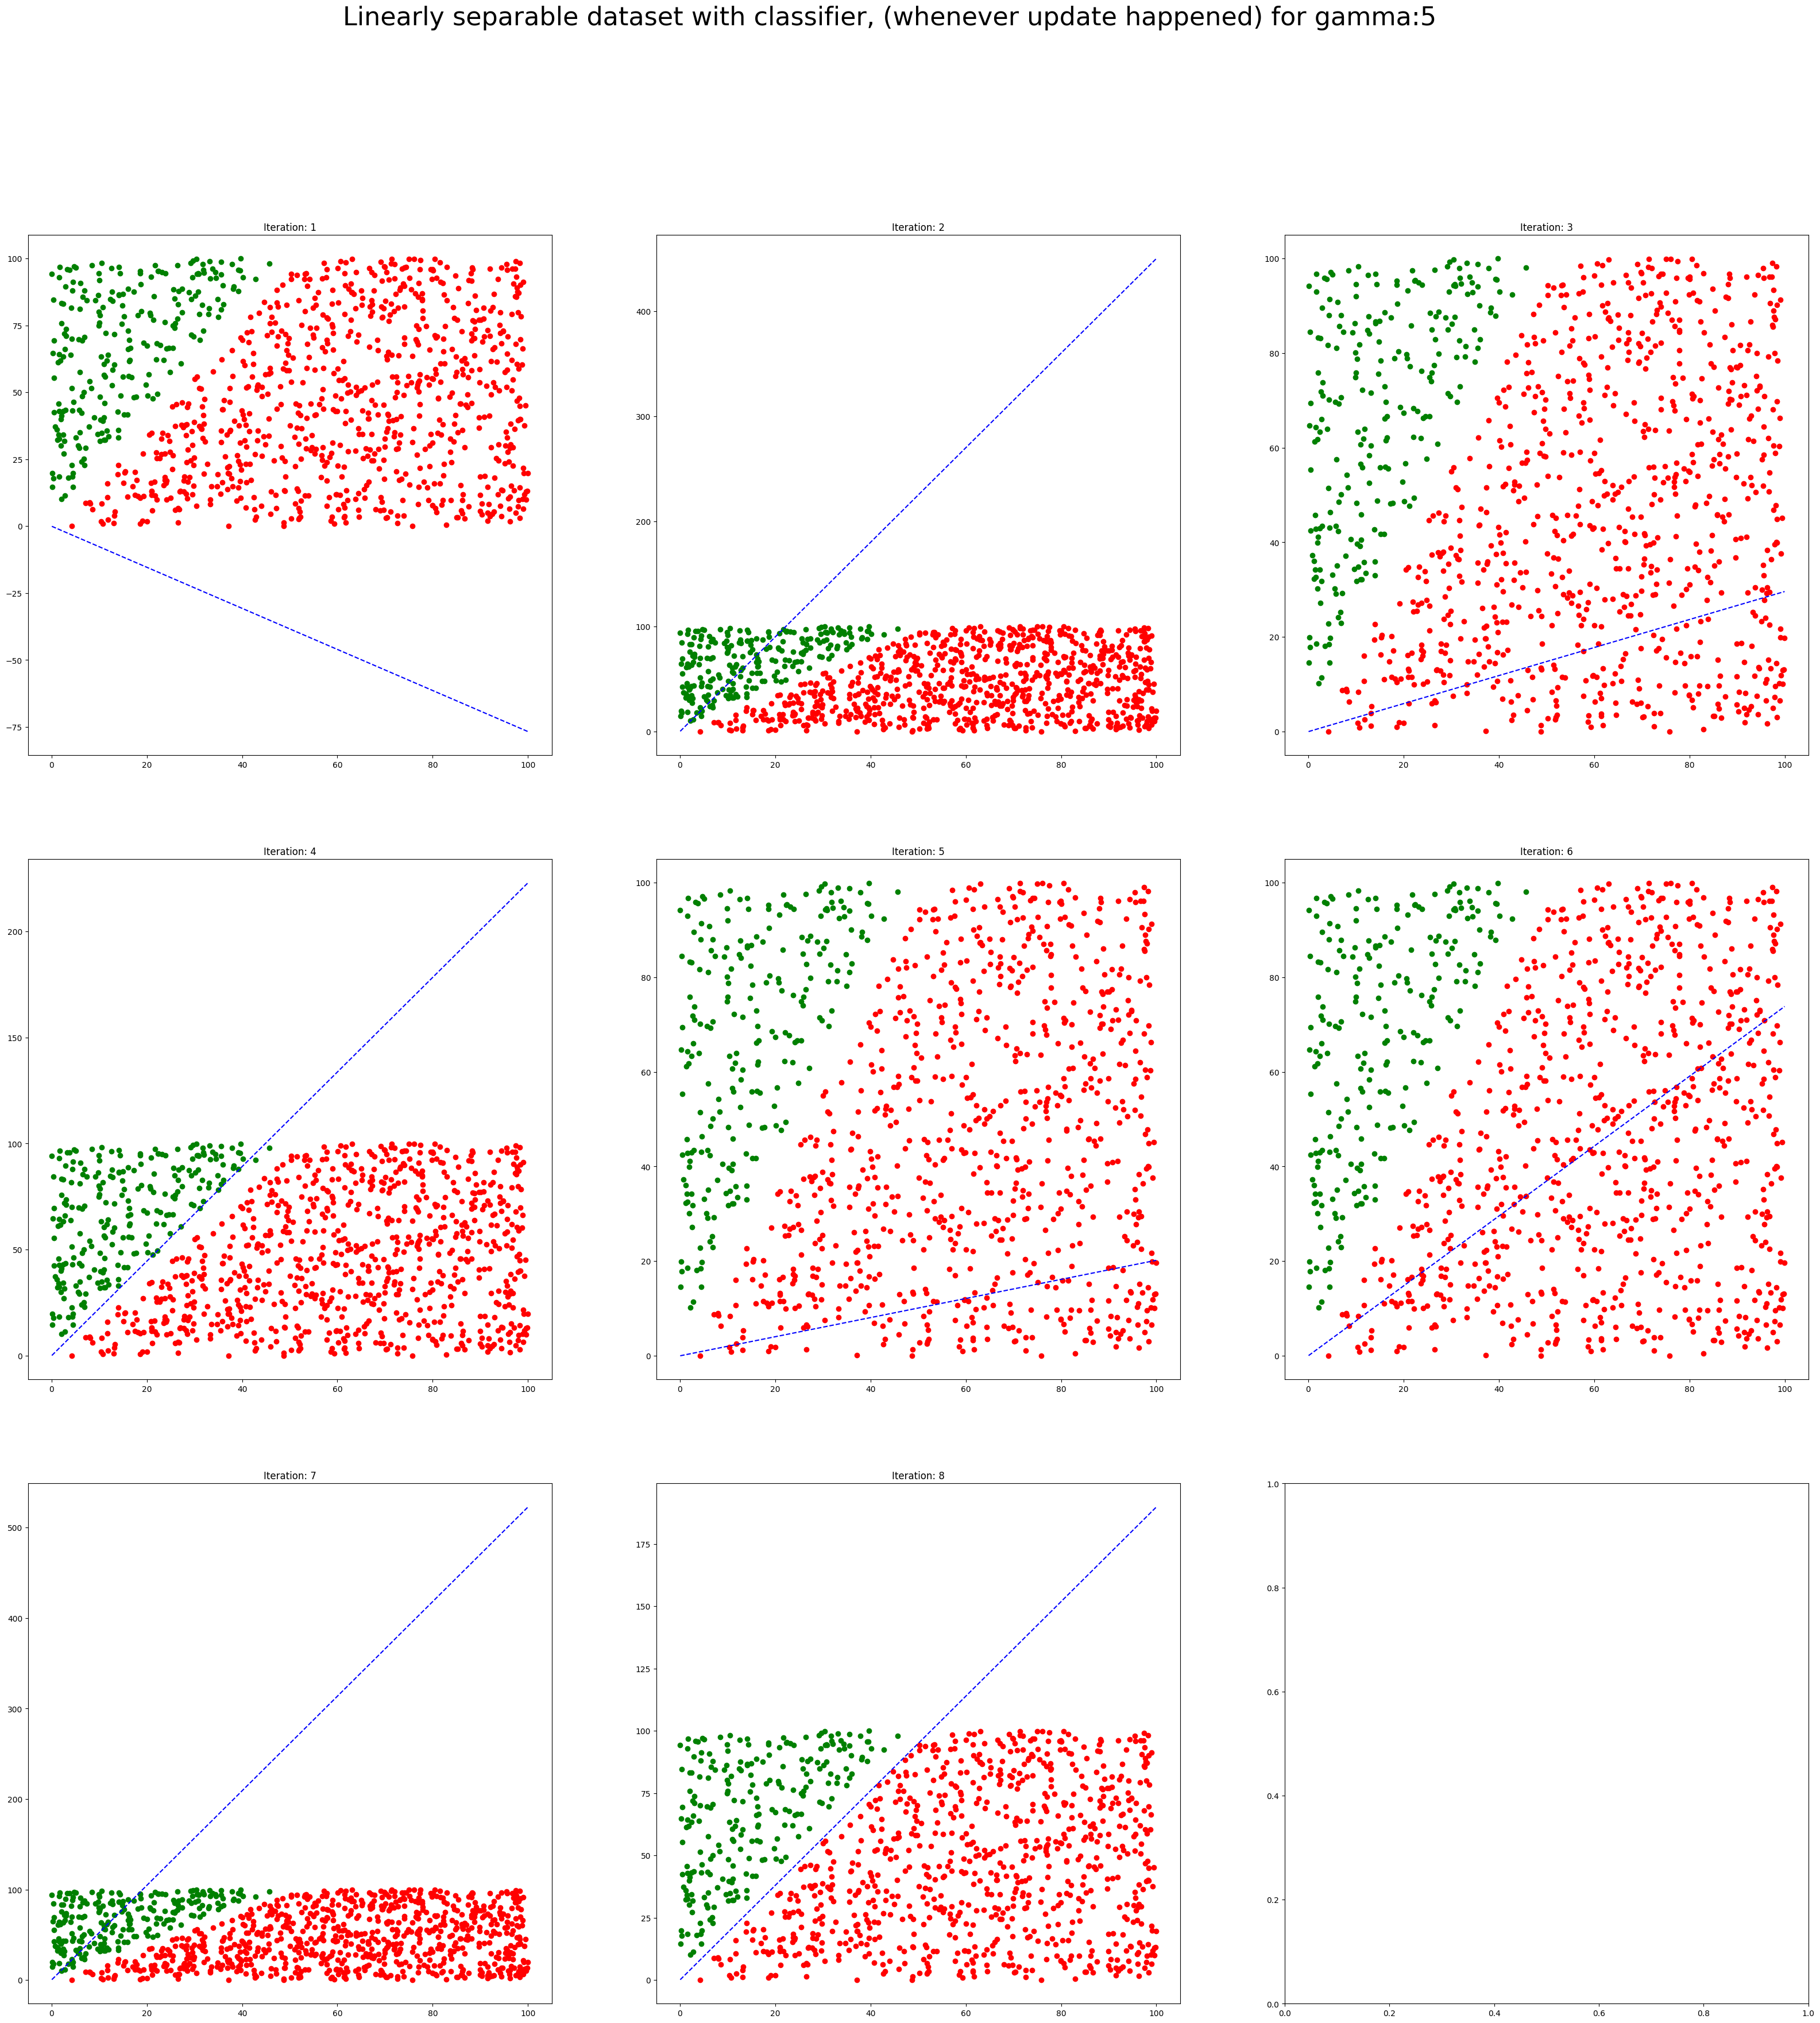

In [4]:
import random

if __name__ == "__main__":

    # I perform perceptron learning algo. for these list of separability values.
    sep_level = [5, 3, 4, 10, 12]   
    avg_iter = []
    p=0
    plotFlag=True

    # for each gamma in sep_level we apply perceptron learning algo. for 5 times and then take the avg. number of iterations and store them in avg_iter
    for gamma in sep_level:
        numIterations = []     

        # for each gamma, we run algo. 5 times
        for j in range(5):
            model = perceptron(lr=0.005)
            datapoints, labels = generateDataset(2, gamma, 1)
            datapoints = np.array(datapoints)
            labels = np.array(labels)
            numIterations.append(model.fit(datapoints, labels, plotFlag))
            plotFlag=False

        # store the average number of iteration in avg_iter list for plotting purpose later.
        numIterations = np.array(numIterations)
        avg_iter.append(np.mean(numIterations))

        # Printing 
        print('Gamma (level of separability): {} \t Avg Number Of Iterations: {}'.format(gamma, np.mean(numIterations)))
        p += 1

##### OBSERVATION: 
In the above figure I have plot the linearly separable dataset (class 1 green, class -1 red) with the classifier (in green) at all the instances when there was a misclassified point and due to which update happened in the decision boundary line. For gamma equal to 5 we can see how the classifier learns from the figure. And finally in the 8th iteration the learnt classifier exactly separates the linearly separable dataset into two halves. 

##### Plot: Average Number of Iterations v/s Gamma

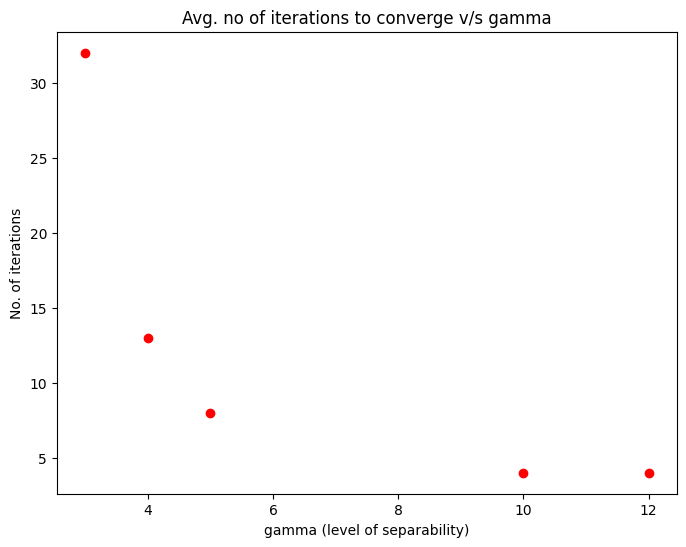

In [5]:
# plotting average numeber of iteration vs level of separability
plt.figure(figsize=(8, 6))
plt.scatter(sep_level, avg_iter, c="red")
plt.xlabel('gamma (level of separability)')
plt.ylabel('No. of iterations')
plt.title('Avg. no of iterations to converge v/s gamma')
plt.show()


##### OBSERVATION: 

As we can observe that the number of iterations to converge keeps decreasing as the level of separability increases, which is expected as when the datapoints are more apart, update due to a misclassified point will lead to many other points which were closer to that point to be correcly classified in further iteration.

## PROBLEM 2

Gradient descent for training a linear classifier<br>
[10 = loss formulation 4 + gradient computation 3 + update equation 3]<br>

##### Generating Dataset

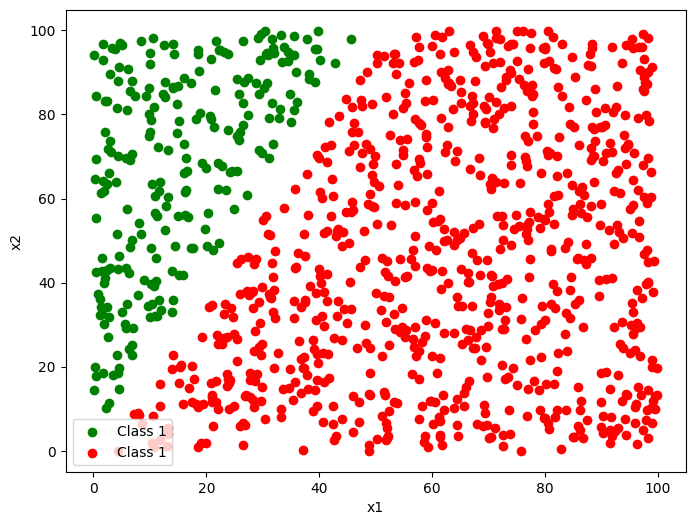

In [6]:
# getting the dataset which is linearly separable, used the same function which I defined in problem 1
new_data, new_labels = generateDataset(2, 5, 1)
new_data = np.array(new_data)
new_labels = np.array(new_labels)

# plotting the dataset without the classifier befor applying gradient descent to learn classifier
plt.figure(figsize=(8,6))
plt.scatter(new_data[new_labels == 1][:, 0], new_data[new_labels == 1][:, 1], color='green', label='Class 1')
plt.scatter(new_data[new_labels == -1][:, 0], new_data[new_labels == -1][:, 1], color='red', label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

##### Loss Formulation And Gradient Computation

In [7]:
# Defining Loss function
def hinge_loss(y_true, y_pred):
    return np.maximum(0, 1-y_pred*y_true)

# Defining Gradient of hinge loass
def grad_hinge_loss(X, y_true, newWeights):
    y_pred = np.dot(X, newWeights)
    new_misclassified = y_true*y_pred<1
    grad = np.zeros_like(newWeights)
    grad = grad - np.dot(X[new_misclassified].T, y_true[new_misclassified])     # gradient with respect to weights, obtained after substituting y_pred by Wx
    return grad

##### Gradient Descent Algortihm 

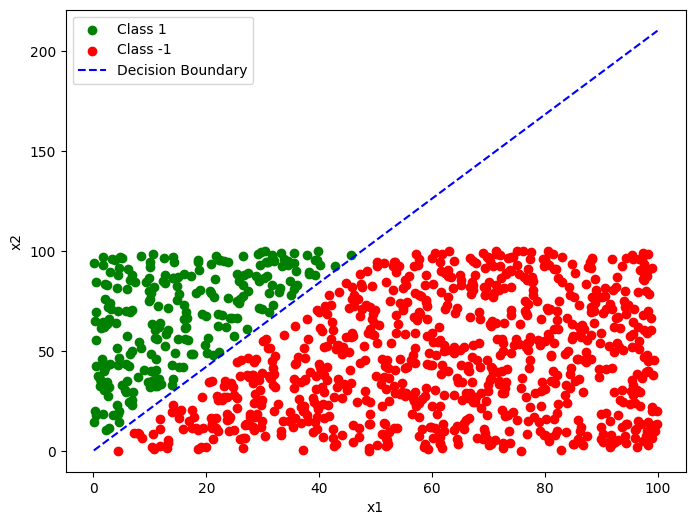

In [8]:
# Applying gradient descent to learn the linear classifier
new_lr = 0.005

# new_data was defined when generating dataset, concatenated ones so that we don't need separate bias
new_data = np.c_[new_data, np.ones(new_data.shape[0])]
oldWeights = np.zeros(new_data.shape[1])    # defining weights matrix shape

# we run algorithm for 1000 iterations, it is hyperparameter.
for iteration in range(1000):
    grad = grad_hinge_loss(new_data, new_labels, oldWeights)
    oldWeights = oldWeights - new_lr*grad   # UPDATE EQUATION

# Plotting the datapoints same as earlier 
plt.figure(figsize=(8,6))
plt.scatter(new_data[new_labels == 1][:, 0], new_data[new_labels == 1][:, 1], color='green', label='Class 1')
plt.scatter(new_data[new_labels == -1][:, 0], new_data[new_labels == -1][:, 1], color='red', label='Class -1')
x_values = np.linspace(np.min(new_data[:, 0]), np.max(new_data[:, 0]), 100)

# Plotting the decision boundary
plt.plot(x_values, -1*(oldWeights[0]/oldWeights[1])*x_values-1*(oldWeights[2]/oldWeights[1]), color='blue', linestyle='--', label='Decision Boundary') 
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

## PROBLEM 3

MLP with a single hidden layer<br>
[20 = dataset creation 5 + MLP definition 5 + backprop 10]<br>

##### Generating Dataset

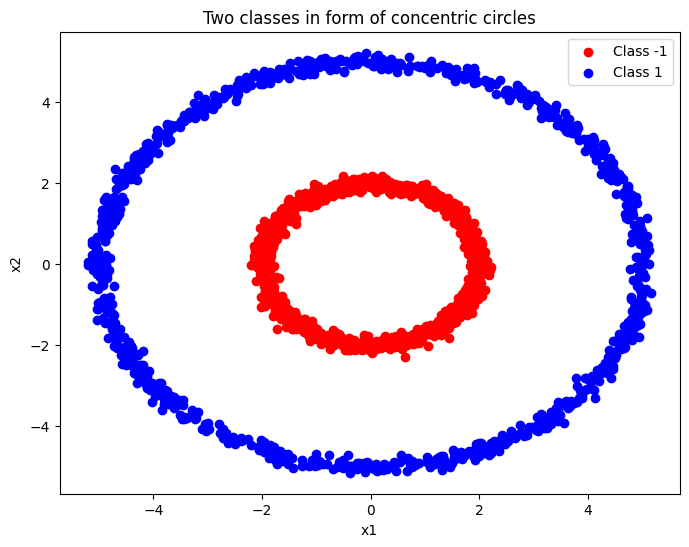

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# generating dataset which contains two classes in form of concentric circles
numSamples = 1000
inRadii = 2
outRadii = 5
noise = 0.1

# Any point on the circumference of circle with radius r, can be written as (r*Cos(theta), r*Sin(theta))
# where theta is angle made by that point on circumference with x-axis in anticlockwise direction

# data generation for inner circle datapoints
random.seed(40)
thetaIn = np.random.uniform(0, 2*np.pi, numSamples)
inRadii = inRadii + np.random.normal(0, noise, numSamples)
x_inClass = inRadii*np.cos(thetaIn)
y_inClass = inRadii*np.sin(thetaIn)
labels_inClass = -1*np.ones(numSamples)

# data generation for outer circle datapoints
thetaOut = np.random.uniform(0, 2*np.pi, numSamples)
outRadii = outRadii + np.random.normal(0, noise, numSamples)
x_outClass = outRadii*np.cos(thetaIn)
y_outClass = outRadii*np.sin(thetaIn)
labels_outClass = np.ones(numSamples)

# plotting data
plt.figure(figsize=(8,6))
plt.scatter(x_inClass, y_inClass, c='red', label='Class -1')
plt.scatter(x_outClass, y_outClass, c='blue', label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Two classes in form of concentric circles')
plt.legend()
plt.show()

##### Reshuffling Dataset Before Feeding Into MLP 

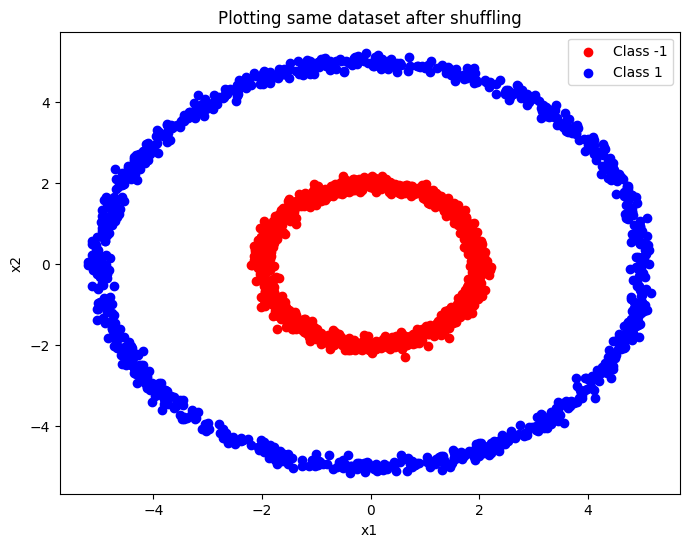

In [10]:
import random

# Schuffle the above datapoints with labels before feeding into network, 
# Schuffling done so that all the datapoints of same class are not fed to network first and then foolowed by the second class, to add randomness.

# stored datapoints with their corresponding lables in a dictionary so that we can do schuffling with labels.
my_dict = {}
for l in range(len(x_inClass)):
    my_dict[(x_inClass[l], y_inClass[l])]=-1
    my_dict[(x_outClass[l], y_outClass[l])]=1

# to shuffle we need to get the items in form of list
shuffled_items = list(my_dict.items())
random.seed(40)
random.shuffle(shuffled_items)

# extracting keys and corresponding labels and preparing the final dataset which we will feed intp network
my_dictkeys, my_dictValues = zip(*shuffled_items)
p3_datapoints = np.array(my_dictkeys)
p3_labels = np.array(my_dictValues)
p3_labels2D = p3_labels.reshape(-1, 1)

# plotting to cross check if the dataset is same as the originally generated dataset
plt.figure(figsize=(8,6))
plt.scatter(p3_datapoints[p3_labels==-1][:, 0], p3_datapoints[p3_labels==-1][:, 1], c='red', label='Class -1')
plt.scatter(p3_datapoints[p3_labels==1][:,0], p3_datapoints[p3_labels==1][:,1], c='blue', label='Class 1')
plt.title("Plotting same dataset after shuffling")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

##### MLP Defintion 1: Defining Activation Function And Its Derivative

In [11]:
# I chose relu as the activation function for hidden layer 1 and I will use raw outputs for loss function, so no output function is there.
def relu(x):
    return np.maximum(0, x)

# deivative of the ReLU funtion
def derivativeRelu(x):
    return np.where(x>0, 1, 0)

##### MLP Defintion 2: Defining Structue of MLP And Backpropagation Algorithm

In [12]:
# Now that dataset is ready we can define our MLP structure, hidden layer is said to be 1 but,
# the number of perceptrons in hidden layer is a hyperparameter.

# Structure of MLP
hidden1_size = 20   # only 1 hidden layer with 10 perceptrons in it
output_size = 1     # for binary classification 1 o/p is sufficient
input_size = 2      # 2 inputs x1 and x2 are there

# Initializing weights and bias for hidden layer
weightsHidden = np.random.rand(input_size, hidden1_size)
biasesHidden = np.zeros(hidden1_size)

# Initializing weights and bias for output layer
weightsOutput = np.random.rand(hidden1_size, output_size)
biasOutput = 0

# Learning rate and number of iterations
newLR = 0.0005
newNumIterations = 1000

# training starts
for a in range(newNumIterations):
    # Forward pass 
    hidden1Inputs = np.dot(p3_datapoints, weightsHidden) + biasesHidden
    hidden1Output = relu(hidden1Inputs)
    finalOutput = np.dot(hidden1Output, weightsOutput) + biasOutput

    # after obtaining raw output (logits) for binary classification we directly calcluate hinge loss funtion without using any output function
    hingeLoss = np.maximum(0, 1-p3_labels2D*finalOutput)

    # After calculating loss now we can start Backpropagation algorithm, computing gradients back to front

    # BACKPROPAGATION STARTS...........

    # going backwise first to compute would be output's gradient with respect to a_L 
    outputGrad = -p3_labels2D*np.where(hingeLoss>0, 1, 0)     

    # Because there is only one hidden layer, we compute the gradient with repect to activation of that layer
    hiddenGrad = np.dot(outputGrad, weightsOutput.T) * derivativeRelu(hidden1Inputs)    

    # Gradient with respect to weight matrix of b/w hidden layer and output layer
    weightsOutputGrad = np.dot(hidden1Output.T ,outputGrad)

    # Gradient with respect to bias of b/w hidden layer and output layer, w.r.t bias is simply outputGrad but because bias is scalar here we sum it
    biasesOutputGrad = np.sum(outputGrad)

    # Gradient with respect to weight matrix of b/w input layer and hidden1 layer (only 1 hidden layer)
    weightsHiddenGrad = np.dot(p3_datapoints.T ,hiddenGrad)

    # Gradient with respect to bias of b/w input layer and hidden1 layer
    biasesHiddenGrad = np.sum(hiddenGrad, axis=0)

    # END OF BACKPROPAGATION.............

    # Updation of parameters
    weightsOutput = weightsOutput - newLR*weightsOutputGrad
    biasOutput = biasOutput - newLR*biasesOutputGrad
    weightsHidden = weightsHidden - newLR*weightsHiddenGrad
    biasesHidden = biasesHidden - newLR*biasesHiddenGrad

# For prediction we return forward pass result

##### Forward Pass And Plotting

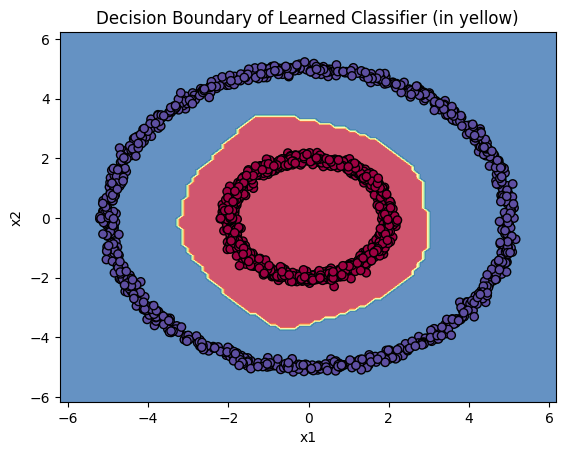

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a grid of points in our input data points range, in these set of points we will apply forward pass.
x_min, x_max = p3_datapoints[:, 0].min() - 1, p3_datapoints[:, 0].max() + 1
y_min, y_max = p3_datapoints[:, 1].min() - 1, p3_datapoints[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Forward pass
input_grid = np.c_[xx.ravel(), yy.ravel()]        # Flatten the grid points into a feature matrix
hidden_input = np.dot(input_grid, weightsHidden) + biasesHidden    # hidden layer input
hidden_output = relu(hidden_input)      # hidden layer output
output = np.dot(hidden_output, weightsOutput) + biasOutput    # there is no output activation function we use raw logits.

# Classifying points
predictions = (output > 0).astype(int)
predictions = predictions.reshape(xx.shape)

# plotting decision boundary and datapoints
plt.contourf(xx, yy, predictions, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(p3_datapoints[:, 0], p3_datapoints[:, 1], c=p3_labels, cmap=plt.cm.Spectral, edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary of Learned Classifier (in yellow)')
plt.show()


##### OBSERVATIONS: 

* For 100 datapoints in each class I am getting very good decision boundary (hyperparameters : samples = 100, lr = 0.005, hidden1_size = 10, numIterations = 1000) <BR>
* For 1000 datapoints in each class I am getting very good decision boundary (hyperparameters : samples = 1000, lr = 0.0005, hidden1_size = 20, numIterations = 1000) <BR>
* when the number of datapoints were more (1000) I just reduced learning rate from 0.05 to 0.005 and I slightly increased the number of perceptrons in hidden layer to get a better decision boundary

#### END OF ASSIGNMENT